# Исследование рынка игр

**ЦЕЛИ И ХОД ИССЛЕДОВАНИЯ**

**Цели**\
Выявить закономерности на рынке игр, определить наиболее популярный продукт/направление с целью использовать полученные выводы для разработки рекламной кампании.

**Задачи**\
Для решения вышеуказанных целей мы решим следующие задачи:
* Ознакомимся с общей информацией о датафрейме, в котором содержатся данные до 2016г
* Осуществим предобработку данных (проверим тип данных, проверим даннные на наличие пропусков, дубликатов, аномальных значений)
* Проведем исследовательский анализ данных: изучим динамику продаж по годам, платформам, жанрам, определим жизненный цикл платформы, определим, какой срез взять для дальнейшего анализа, изучим влияние оценки пользователей и критиков на продажи игр
* Составим портрет пользователя каждого региона
* Сформируем и проверим гипотезы, что средние пользовательские оценки платформ XOne и PC равны, и жанров Actions и Sports - разные

**Добавим названия столбцов датафрейма, с которым  будем работать**:
* Name — название игры
* Platform — платформа\
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Откроем файл и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод по разделу №1**:\
 В датафрейме 16715 строк, 11 столбцов. В некоторых столбцах есть пропущенные значения. Типы данных - строки и вещественные числа.

## Подготовка и предобработка данных

### Названия столбцов
Выполним замену названия столбцов - приведем их к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()

In [4]:
#проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Типы данных
Изучим типы данных в столбцах датафрейма

In [5]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Изменим тип данных в столбце `Год выхода` - оно может быть только целым значением

In [7]:
data['year_of_release']=data['year_of_release'].round().astype('Int64')

Округлим данные в столбце `Оценка критиков` - скорей всего, оценка должна быть целым числом, без десятичных знаков

In [8]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [9]:
data['critic_score']=data['critic_score'].round().astype('Int64')

Столбец `user_score` нужно привести к типу int, так как оценка рейтинга должна быть числом.\
Но при попытке это сделать, выдается ошибка.\
Проверим, в чем может быть дело

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце есть значения "tbd", которые превращают весь столбец в тип object.\
Посмотрим на эти строки

In [11]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.0,0.07,73,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


2 424 строки со значением "tbd". Посмотрим позже, что это может значить, и каким образом эти значения обработать

### Проверка на дубликаты

Проверим датафрейм на наличие явных дубликатов

In [12]:
data.duplicated().sum()

0

### Обработка пропусков

Проверим, сколько пропусков содержит каждый столбец

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [14]:
#проверим пропуски в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Изучим пропуски в столбце `name`

In [15]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


*Всего 2 строчки с пустыми значениями, по ним также пропущен жанр, и нет оценок. Удалим их из датафрейма - они не информативны*

In [16]:
data=data[data['name'].notna()]

In [17]:
# проверим
len(data[data['name'].isna()])

0

Изучим пропуски в столбце `year_of_release`

In [18]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [19]:
data['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, <NA>]
Length: 38, dtype: Int64

*Сложно сказать, по какой причине пропущен год выпуска. Возможно, это техническая ошибка.\
Можно удалить эти строки, так как 269 строк - это очень маленький % от общего датафрейма, а без годы выхода игры данные в строке неинформативны.*

In [20]:
# удалим эти строки из датафрейма
data=data[data['year_of_release'].notna()]

In [21]:
# проверим
data['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64

Изучим пропуски в столбце `critic_score` (в этом столбце больше всего пропусков - 50% от всего датафрейма)

In [22]:
data[data['critic_score'].isna()].head(40)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,9.00,6.18,7.20,0.71,<NA>,NaN,NaN
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,<NA>,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,6.38,4.46,6.04,1.36,<NA>,NaN,NaN
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,<NA>,NaN,NaN
22,Super Mario Bros. 3,NES,1988,Platform,9.54,3.44,3.84,0.46,<NA>,NaN,NaN


*На первый взгляд кажется, что пропуски в столбцах "Оценка пользователей, критиков, и рейтинг" совпадают\
Причина может быть любая - возможно, данные собирались из разных источников (например, от разных поставщиков платформ, и в каких то выгрузках были пропущены данные).\
Инструмента для замены у нас нет, а выборка с пустыми значениями в этих столбцах достаточно большая. Поэтому, удалять из общего датафрейма их не будем.\
"Чистый" датафрейм без пропущенных значений сохраним в отдельной переменной - возможно, нам понадобится это позже*

In [23]:
good_critic_score=data[data['critic_score'].notna()]

In [24]:
#проверим
good_critic_score['critic_score'].isna().sum()

0

Изучим пропуски в столбце `user_score` (более 6000 пропусков)

In [25]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как и в critic_score причина пропусков может быть любая, например, техническая ошибка прив выгрузке или формировании сводного датафрейма, неполнота данных, предоставляемых разными источниками.\
Инструмента для замены у нас так же нет, а выборка с пустыми значениями в этих столбцах достаточно большая. Поэтому, удалять из общего датафрейма их не будем.
"Чистый" датафрейм без пропущенных значений сохраним в отдельной переменной - возможно, нам понадобится это позже

In [26]:
good_user_score=data[data['user_score'].notna()]

In [27]:
#проверим
good_user_score['user_score'].isna().sum()

0

Выполним аналогичные действия для столбца `rating`

In [28]:
good_rating=data[data['rating'].notna()]

In [29]:
#проверим
good_rating['rating'].isna().sum()

0

Вернемся к столбцу `user_score` - значения "tbd"

In [30]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


*В датафрейме есть 2376 строк, где значение в "Оценка пользователей" - tbd. Вероятно, эта абревиатура значит "to be determined" - будет определено. То есть на настоящий момент времени оценка пользователей по какой-то причине не определена.\
Пока не понятно, что делать с этими значениями - удалять их нежелательно, так как это достаточная большая выборка.\
Чтобы продолжать работать со столбцом user_score, нужно как-то обработать значения tbd*

Для начала, создадим отдельный датафрейм со значениями "tbd", чтобы его проанализировать

In [31]:
user_score_tbd=data[data['user_score']=='tbd']

In [32]:
user_score_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,<NA>,tbd,E


Возможно, комментарий "tbd" характерен для какого-то определенного жанра игры, года выхода, платформы, или вообще конкретной игры.\
Выведем уникальные значения этих столбцов

In [33]:
user_score_tbd['name'].unique()

array(['Zumba Fitness', 'Namco Museum: 50th Anniversary',
       'Zumba Fitness 2', ..., 'Mega Brain Boost', 'Plushees',
       'Men in Black II: Alien Escape'], dtype=object)

In [34]:
user_score_tbd['platform'].unique()

array(['Wii', 'PS2', 'GBA', 'PC', 'DS', 'PS', 'X360', 'PS3', 'GC', 'PSP',
       'XB', '3DS', 'WiiU', 'XOne', 'PSV', 'PS4'], dtype=object)

In [35]:
user_score_tbd['genre'].unique()

array(['Sports', 'Misc', 'Simulation', 'Action', 'Puzzle', 'Adventure',
       'Platform', 'Racing', 'Fighting', 'Role-Playing', 'Shooter',
       'Strategy'], dtype=object)

In [36]:
user_score_tbd['year_of_release'].unique()

<IntegerArray>
[2010, 2005, 2011, 2009, 2004, 1999, 2001, 2008, 2007, 2003, 2000, 2006, 2002,
 2015, 2014, 2012, 2013, 2016, 1997]
Length: 19, dtype: Int64

*Никаких явных закономерностей, по какому признаку был присвоен комментарий "tbd", не наблюдается.\
Просто по какой-то причине оценка не указана.
У нас нет инструмента, с помощью которого мы можем заполнить эти значения какими-то другими.\
Поэтому просто отметим эти значения как отсутствующие - заменим на NaN (пустые значения).\
Перед этим создадим столбец `comment`, где отметим эти строки с tbd на случай, если эти данные нам все-таки понадобятся в дальнейшем*

In [37]:
# создадим пустой столбец
data['comment']=""

In [38]:
# отметим комментарием tbd те строки, где это было указано в `user_score`
data.loc[data['user_score']=='tbd','comment']='tbd'

In [39]:
# проверим
data[data['comment']=='tbd'].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,<NA>,tbd,E,tbd
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+,tbd
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,<NA>,tbd,T,tbd
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E,tbd
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,<NA>,tbd,E,tbd


"Убьем двух зайцев" - изменим тип данных в столбце `user_score` и заменим значения "tbd" на пустые NaN. 

In [40]:
data['user_score']=pd.to_numeric(data['user_score'],errors='coerce')

In [41]:
# проверим
len(data[data['user_score']=='tbd'])

0

In [42]:
# пересохраним переменную good_user_score с учетом замены tbd на NaN
good_user_score=data[data['user_score'].notna()]

In [43]:
# проверим
good_user_score['user_score'].unique()

array([8. , 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9, 8.1,
       8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2,
       7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1,
       6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8, 5.6,
       5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5,
       1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. , 1.6,
       9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6,
       1.4, 0.9, 1. , 9.7])

*Значения округлены, тип изменен на int, tbd заменены*

Финально проверим, изменен ли тип данных в столбцах, которые мы меняли

In [44]:
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
comment             object
dtype: object

In [45]:
# посчитаем кол-во пустых значений в столбцах
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
comment               0
dtype: int64

*Все верно - значений в столбце `user_score` стало больше, так как мы заменили "tbd" на NaN*

### Суммарные продажи - добавление столбца

Посчитайтаем суммарные продажи во всех регионах и запишием их в отдельный столбец

In [46]:
# создадим столбец с суммарными продажами
data[['na_sales', 'eu_sales','other_sales']].sum(axis=1)

### Проверим датафрейм на наличие аномалий и странных значений, ознакомимся со значениями в каждом столбце

In [48]:
data['name'].sort_values().unique()

array([' Beyblade Burst', ' Fire Emblem Fates', " Frozen: Olaf's Quest",
       ..., 'uDraw Studio', 'uDraw Studio: Instant Artist',
       '¡Shin Chan Flipa en colores!'], dtype=object)

In [49]:
len(data['name'].unique())

11426

In [50]:
data['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [51]:
data['year_of_release'].sort_values().unique()

<IntegerArray>
[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
Length: 37, dtype: Int64

In [52]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [53]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

In [54]:
data['total_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.552e+01, 4.024e+01,
       8.254e+01])

In [55]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [56]:
data[data['user_score']==0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment,total_sales
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,<NA>,0.0,E,,0.72


In [57]:
data['critic_score'].sort_values().unique()

<IntegerArray>
[  13,   17,   19,   20,   21,   23,   24,   25,   26,   27,   28,   29,   30,
   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
   96,   97,   98, <NA>]
Length: 82, dtype: Int64

In [58]:
data.sort_values(by='total_sales').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment,total_sales
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.0,<NA>,NaN,NaN,,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,<NA>,NaN,NaN,,0.00
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,NaN,,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016,Misc,0.01,0.00,0.00,0.0,<NA>,NaN,T,tbd,0.01
16181,Sakura Sakura: Haru Urara,PSP,2010,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,NaN,,0.01
16179,Pro Angler Moves,PS3,2012,Sports,0.01,0.00,0.00,0.0,<NA>,NaN,E,tbd,0.01
16178,Egg Mania: Eggstreme Madness,XB,2002,Puzzle,0.01,0.00,0.00,0.0,58,NaN,E,tbd,0.01
16177,Destiny Links,DS,2009,Role-Playing,0.00,0.00,0.01,0.0,<NA>,NaN,NaN,,0.01
16176,Fab 5 Soccer,DS,2008,Sports,0.01,0.00,0.00,0.0,<NA>,NaN,E,tbd,0.01
16175,Psycho-Pass,XOne,2014,Adventure,0.00,0.00,0.01,0.0,<NA>,NaN,NaN,,0.01


In [59]:
len(data[data['total_sales']==0])

2

*Есть 2 игры без продаж, скорей всего, это какая-то ошибка, но не будем их удалять, так как 2 строчки из 16 000 не сыграют никакой роли*

*Мы бегло ознакомились со значениями в каждом столбце, на первый взгляд, никаких странных и аномальных значений, кроме пустых, которые вы выявили ранее, не обнаружено.*

**ВЫВОД ПО РАЗДЕЛУ №2**\
Выполнена проверка данных и предобработка:
* Названия столбцов приведены к нижнему регистру
* Изменен тип данных  в столбцах "Год выхода", "Оценка критиков", "Оценка пользователей"
* Осуществлена проверка данных на явные на дубликаты
* Удалено 2 строки без указания названия игры, удалены 269 строки без указания года выхода игры
* Обработали пропуски в столбце «оценка пользователя», «оценка критиков», «рейтинг» - "чистые" данные сохранены в отдельные переменные
* Посчитаны суммарные продажи по всем регионах, данные сохранены в отдельном столбце
* Датафрейм проверен на наличие аномалий и странных значений
* Мы ознакомились со значениями всех стобцов

## Исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [60]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,,35.52


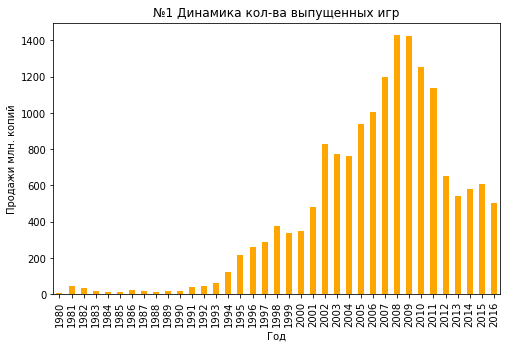

In [61]:
# сгруппируем данные по продажам в срезе по годам
data.groupby('year_of_release')['total_sales'].count().plot(kind='bar',color='orange',title='№1 Динамика кол-ва выпущенных игр',xlabel='Год',ylabel='Продажи млн. копий',figsize=(8,5));

*Наблюдается увеличение объема продаж за период с 1995 по 2016 г.Больше всего игр было продано с 2005 по 2011 год.\
На данном этапе какие-либо данные из выборки удалять нецелесообразно, так как они тоже показывают динамику за определенный период.*

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [62]:
# сгруппируем данные по платформам - посчитаем суммарные продажи по ним
data.groupby('platform').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


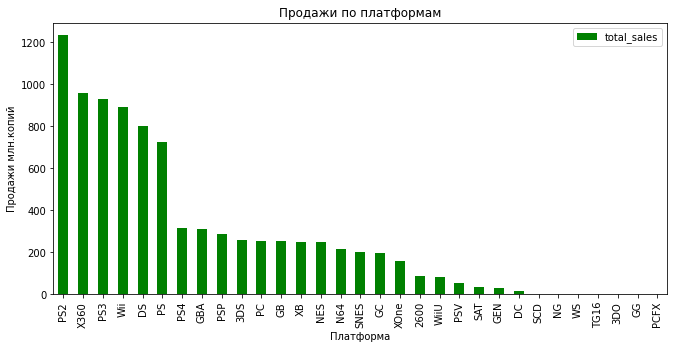

In [63]:
data.groupby('platform').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False).plot(kind='bar',title='Продажи по платформам',xlabel='Платформа',ylabel='Продажи млн.копий',figsize=(11,5),color='green');

In [64]:
# сгруппируем данные по платформам - посчитаем суммарные продажи по ним и выберем ТОП платформы
top_sales_platform=data.groupby('platform').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False).head(6)

top_sales_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


*У нас есть 6 платформ с наибольшими суммарными продажами.\
Сгруппируем данные о продажах по эти платформам по годам*

In [65]:
data.query('platform in @top_sales_platform.index').\
groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform  year_of_release
DS        1985                 0.02
          2004                17.27
          2005               130.14
          2006               119.81
          2007               146.94
                              ...  
X360      2012                99.74
          2013                88.58
          2014                34.74
          2015                11.96
          2016                 1.52
Name: total_sales, Length: 67, dtype: float64

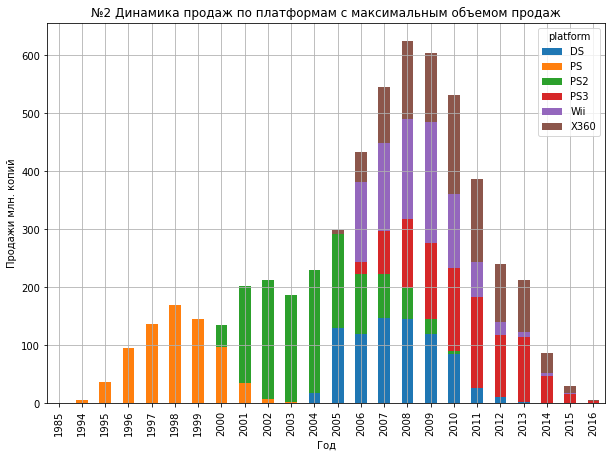

In [66]:
# построим столбчатую диаграмму
data.query('platform in @top_sales_platform.index').\
groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').\
plot(kind='bar', grid=True, figsize=(10,7), stacked=True)

plt.title('№2 Динамика продаж по платформам с максимальным объемом продаж')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Год')
plt.show()

*График показывает, что в среднем платформа существует 9 лет*

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год

Поскольку нам интересны те данные, которые помогут построить прогноз на 2017г., они должны быть актуальные.\
2016 г мы брать не будем, так как данные по нему не полные.\
Определим, для каких платформ выпускались игры в 2015 - нам интересны данные по этим платформам, так как они самые актуальные, некоторые платформы, возможно, уже не существуют

In [67]:
# сгруппируем данные по продажам по платформам за 2015г
actual_platform_2015=data.query('year_of_release==2015').groupby('platform').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False)

actual_platform_2015

,total_sales
platform,
PS4,118.90
XOne,60.14
3DS,27.78
PS3,16.82
WiiU,16.35
X360,11.96
PC,8.52
PSV,6.25
Wii,1.14


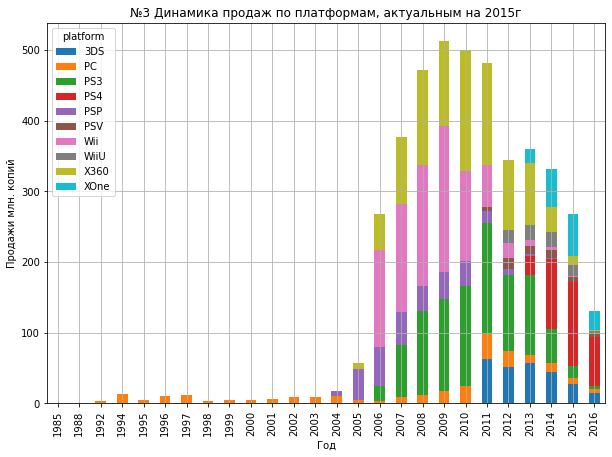

In [68]:
# построим столбчатую диаграмму
data.query('platform in @actual_platform_2015.index').\
groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').\
plot(kind='bar', grid=True, figsize=(10,7), stacked=True)

plt.title('№3 Динамика продаж по платформам, актуальным на 2015г')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Год')
plt.show()

*Итак, у нас 10 платформ, которые существовали в 2015. Логично далее работать с ними, так как анализировать те, что уже не существуют - не имеет смысла.\
Посколько мы ранее выяснили,что средний жизненный цикл платформы - 9 лет, имеет смысл расмматривать сопоставимый период, а именно с 2006г.*

Сохраним выборку с данными с 2006 по 2015 г в отдельный датафрейм

In [69]:
actual_data=data[(data['year_of_release']>=2006)&(data['year_of_release']<=2015)]

In [70]:
# проверим
actual_data['year_of_release'].unique()

<IntegerArray>
[2006, 2008, 2009, 2007, 2010, 2013, 2011, 2015, 2012, 2014]
Length: 10, dtype: Int64

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ

In [71]:
# построим свобдную таблицу по продажам в срезах платформа/год
actual_data.pivot_table(index='platform', columns='year_of_release',values='total_sales', aggfunc='sum')

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
platform,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78
DC,NaN,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN
GBA,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,11.26,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PC,2.85,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52
PS2,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN
PS3,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати эту таблицу мы можем также визуализировать с помощью тепловой карты.
    
В этом нам поможет функцию `heatmap` из библиотеки `seaborn`.
    
</div>

In [72]:
# сгруппируем данные с продажами по платформе/году
actual_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()

platform  year_of_release
3DS       2011               63.20
          2012               51.36
          2013               56.57
          2014               43.76
          2015               27.78
                             ...  
XB        2007                0.55
          2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
Name: total_sales, Length: 93, dtype: float64

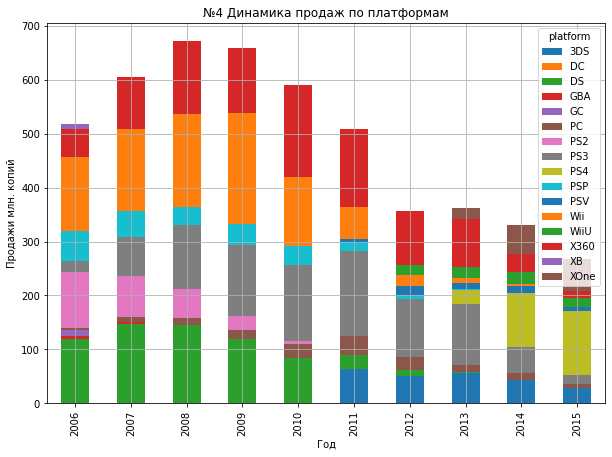

In [73]:
# построим столбчатую диаграмму по сводной таблице
actual_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').\
plot(kind='bar', grid=True, figsize=(10,7), stacked=True)

plt.title('№4 Динамика продаж по платформам')
plt.ylabel('Продажи млн. копий')
plt.xlabel('Год')
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>Закомментированный код лучше всего удалять из финальной версии проекта, чтобы он не портил его презентабельность.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> +код удалила</div>

* За последние года по продажам лидирует платформа **PS4** - занимает бОльшую долю и показывает рост.
* Также платформа **XOne** показывает рост и занимает 2е место по доле продаж.
* Платформа **WiiU** сохраняет свои позиции, занимает 3е место по объему продаж.\
Эти 3 платформы являются потенциально прибыльными, так как у них растущий тренд.

Платформы **3DS** и **X360** последние 4 года занимали неплохую долю в продажах, но у них падающий тренд по продажам.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

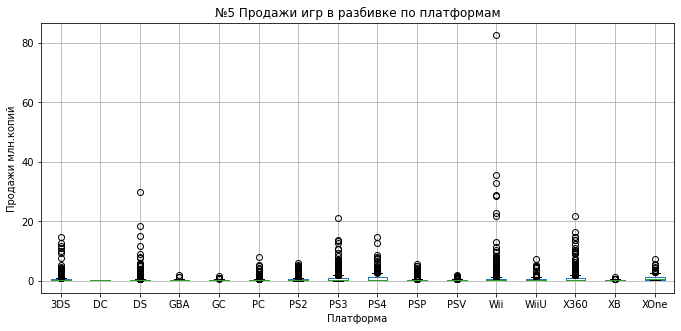

In [74]:
# построим диаграмму размаха
actual_data.boxplot(column='total_sales',by='platform',figsize=(11,5))
plt.title('№5 Продажи игр в разбивке по платформам')
plt.suptitle('')
plt.ylabel('Продажи млн.копий')
plt.xlabel('Платформа')
plt.show()

*Из-за "выбросов" график неразборчив. Изменим масшиб, посмотрим покрупнее*

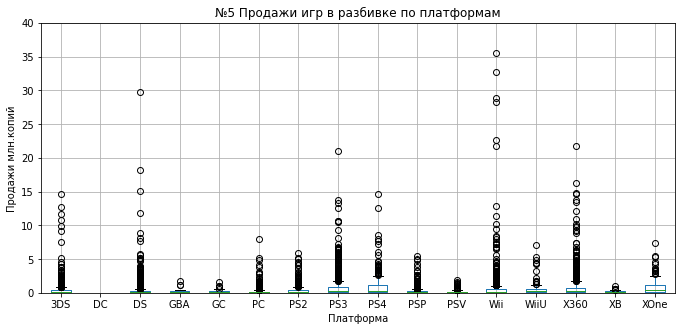

In [75]:
actual_data.boxplot(column='total_sales',by='platform',figsize=(11,5))
plt.title('№5 Продажи игр в разбивке по платформам')
plt.suptitle('')
plt.ylabel('Продажи млн.копий')
plt.xlabel('Платформа')
plt.ylim(0,40)
plt.show()

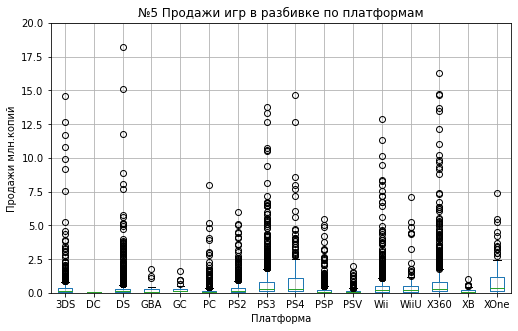

In [76]:
actual_data.boxplot(column='total_sales',by='platform',figsize=(8,5))
plt.title('№5 Продажи игр в разбивке по платформам')
plt.suptitle('')
plt.ylabel('Продажи млн.копий')
plt.xlabel('Платформа')
plt.ylim(0,20)
plt.show()

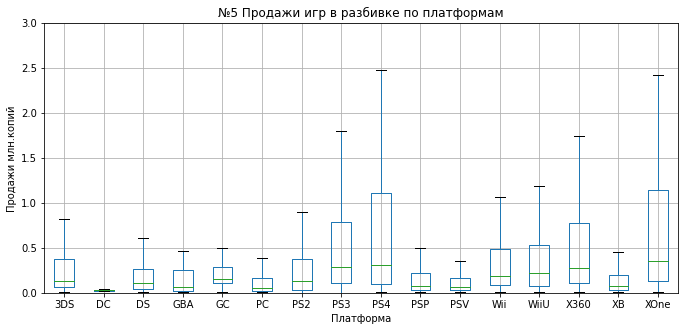

In [77]:
actual_data.boxplot(column='total_sales',by='platform',figsize=(11,5),showfliers=False)
plt.title('№5 Продажи игр в разбивке по платформам')
plt.suptitle('')
plt.ylabel('Продажи млн.копий')
plt.xlabel('Платформа')
plt.ylim(0,3)
plt.show()

*График подтверждает выводы, сделанные ранне по предыдущим графикам - по продажам лидируют платформы PS4, XOne, WiiU, X360, PS3.\
Поскольку PS3 и X360 уже практически перестали существовать, не будем на них останавливаться.*

**PS4** и **XOne** конкурируют друг с другом в продажах.\
Большинство игр по **PS4** имеют тираж до 1,1 млн копий (границы "ящика"). Средний тираж игр составляет около 250 000 копий (медиана). У платформы много бестселлеров (выбросы на графике), продажи которых достигают до 15 млн копий. \
Большинство игр по **XOne** имеют тираж до 1,2 млн копий. Средний тираж игр составляет около 350 000 копий. У платформы также есть бестселлеры, продажи которых достигают до 7,5 млн копий.\
По платформе **WiiU** большинство игр имеет тираж до 500 000 копий. Средний тираж игр составляет около 150 000 копий. У платформы много бестселлеров, продажи которых достигают до 12,6 млн копий.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный способ визуализировать разброс данных по каждой платформе 👍
    
Кстати мы можем использовать параметр `showfliers=False`, чтобы убрать выбросы с графика.
    
Также можно увеличить график в ширь, тогда он станет более читабельным.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Спасибо за совет! Не знала от такой опции. Воспользовалась ей выше на графике 5 :). </div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Супер! :)
    
</div>

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы

#### Посмотрим на зависимость продаж от оценки КРИТИКОВ на примере одной из платформ PS4

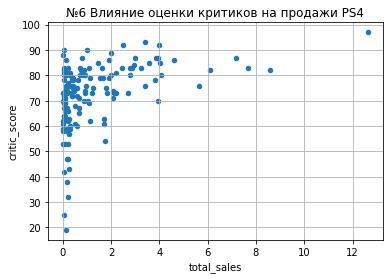

In [78]:
# построим диаграмму рассеяния
actual_data.query('platform=="PS4" & critic_score.notna()')\
.plot(kind='scatter',x='total_sales',y='critic_score',grid=True,title='№6 Влияние оценки критиков на продажи PS4');

In [79]:
# посчитаем корреляцию
actual_data.query('platform=="PS4" & critic_score.notna()')[['critic_score','total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.431848
total_sales,0.431848,1.000000


*Коэффицент Пирсона 0,43 говорит о наличии связи между оценкой критиков и продажами - чем выше оценка, тем выше продажи, но это связь не сильная*

#### Посмотрим на зависимость продаж от оценки ПОЛЬЗОВАТЕЛЕЙ на примере одной из платформ PS4

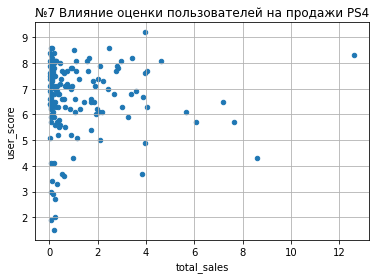

In [80]:
# построим диаграмму рассеяния
actual_data.query('platform=="PS4" & user_score.notna()')\
.plot(kind='scatter',x='total_sales',y='user_score',grid=True,title='№7 Влияние оценки пользователей на продажи PS4');

In [81]:
# посчитаем корреляцию
actual_data.query('platform=="PS4" & user_score.notna()')[['user_score','total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.024231
total_sales,0.024231,1.000000


*График и коэффициент корреляции, длизкий к нулю, говорят о слабой взаимосвязи продаж и рейтинга пользователей.\
Возможно, на показатель влияют какие-то третьи смежные факторы, или же, связи действительно нет*

### Соотнесите выводы с продажами игр на других платформах

Изучим зависимость продаж от оценки **КРИТИКОВ** по другим платформам

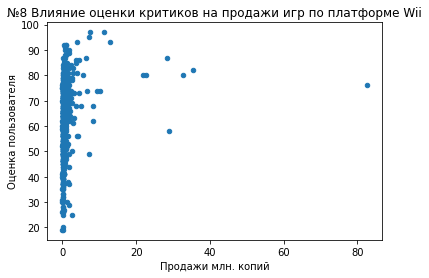

Коэффициент Пирсона по Wii 0.17790728577594905


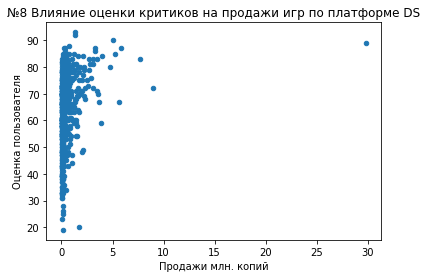

Коэффициент Пирсона по DS 0.2329502598859499


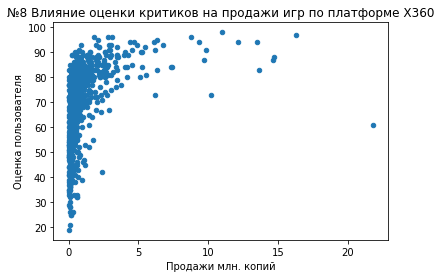

Коэффициент Пирсона по X360 0.39630669748604147


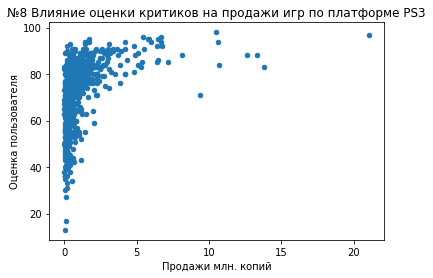

Коэффициент Пирсона по PS3 0.4327589578997134


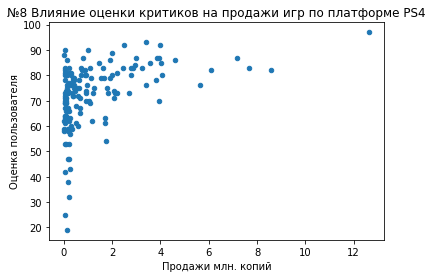

Коэффициент Пирсона по PS4 0.4318482049982007


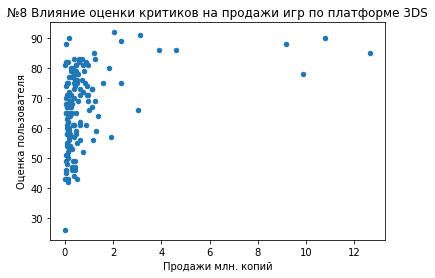

Коэффициент Пирсона по 3DS 0.3610269340210958


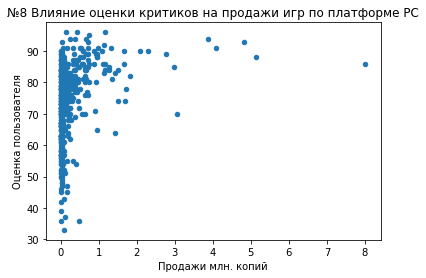

Коэффициент Пирсона по PC 0.29778461350943475


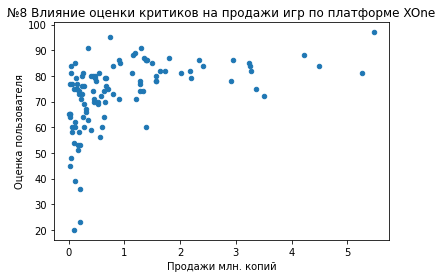

Коэффициент Пирсона по XOne 0.4593845680707111


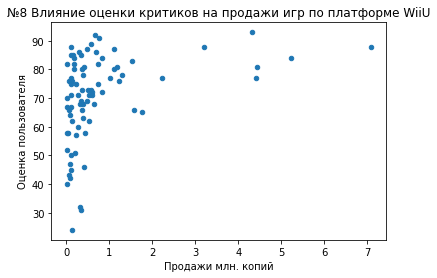

Коэффициент Пирсона по WiiU 0.3546914930621988


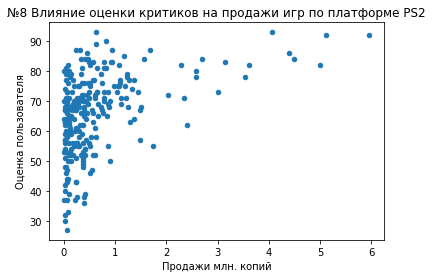

Коэффициент Пирсона по PS2 0.4386557674802552


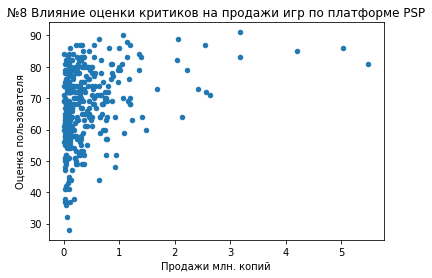

Коэффициент Пирсона по PSP 0.3153395717519696


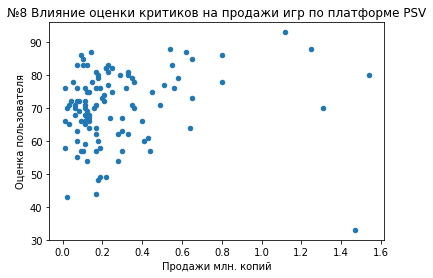

Коэффициент Пирсона по PSV 0.15574957190078853


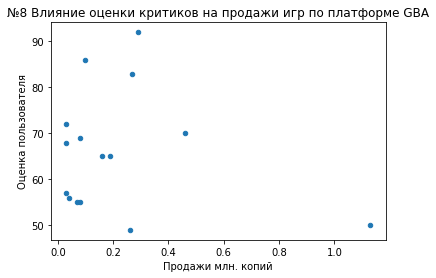

Коэффициент Пирсона по GBA -0.17683120081236364


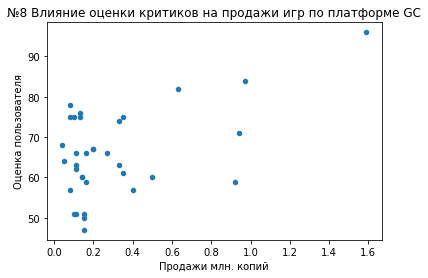

Коэффициент Пирсона по GC 0.5180946573895007


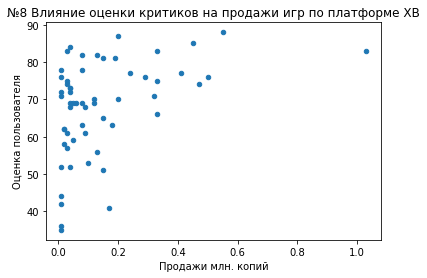

Коэффициент Пирсона по XB 0.41406202828431676


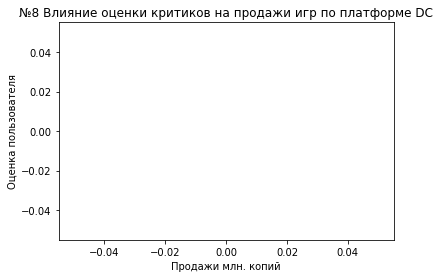

Коэффициент Пирсона по DC nan


In [82]:
# построим аналогичные графики для всех остальных платформ с помощью цикла
for value in actual_data['platform'].unique():
    critic_score_influence=actual_data.query('platform == @value & critic_score.notna()')
    critic_score_influence.plot(x='total_sales', y='critic_score', kind='scatter')
    plt.xlabel("Продажи млн. копий")
    plt.ylabel("Оценка пользователя")
    plt.title(f'№8 Влияние оценки критиков на продажи игр по платформе {value}')
    plt.show()
    corr=critic_score_influence[['critic_score','total_sales']].corr()
    print("Коэффициент Пирсона по", value, corr.loc['total_sales','critic_score'])

*Графики подтверждают вывод, сделанный ранее по платформе PS4 - взаимосвязь между оценкой критиков есть, но не сильная.\
Коэффицент Пирсона не превышает 0,51 - это максимальное значение, зафиксированное по платформе GC*

Изучим зависимость продаж от оценки **ПОЛЬЗОВАТЕЛЕЙ** по другим платформам

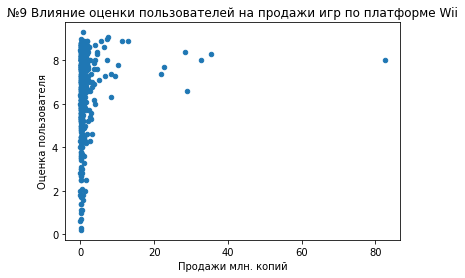

Коэффициент Пирсона по Wii 0.11283121360773724


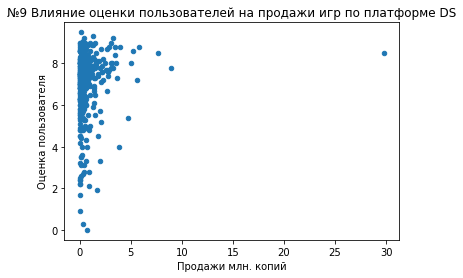

Коэффициент Пирсона по DS 0.12044742662489247


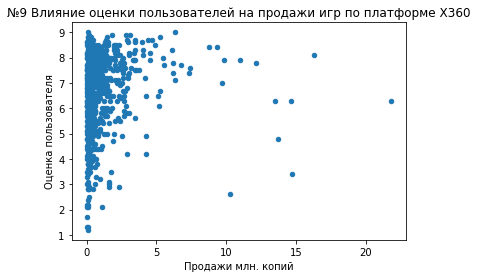

Коэффициент Пирсона по X360 0.11280091542530915


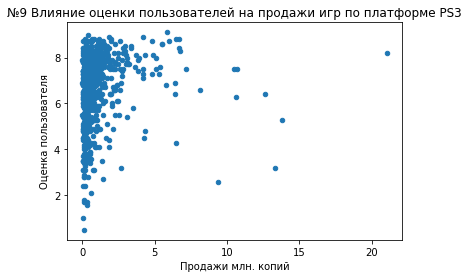

Коэффициент Пирсона по PS3 0.12426430250873467


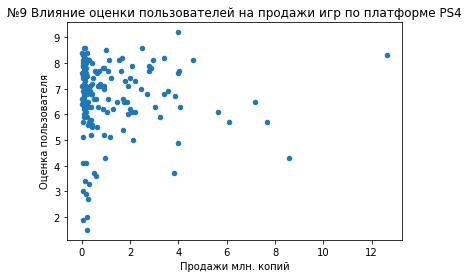

Коэффициент Пирсона по PS4 0.02423083236062296


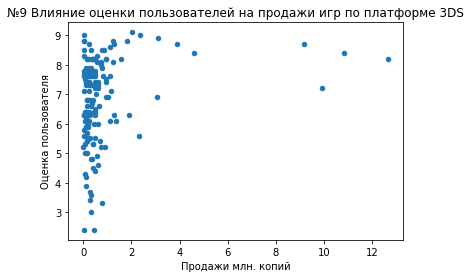

Коэффициент Пирсона по 3DS 0.23441244400535494


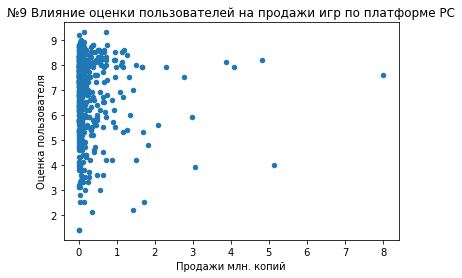

Коэффициент Пирсона по PC -0.03083882573976081


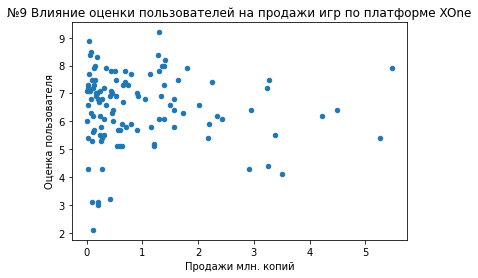

Коэффициент Пирсона по XOne -0.039268285445522466


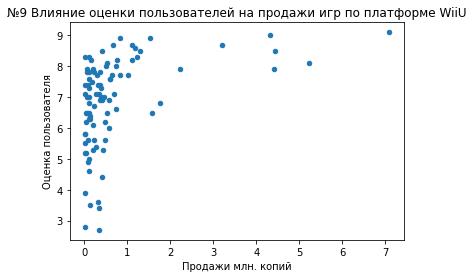

Коэффициент Пирсона по WiiU 0.4132654178028676


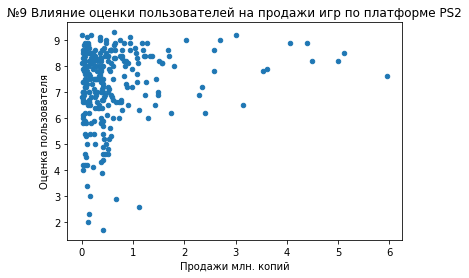

Коэффициент Пирсона по PS2 0.18265788155375784


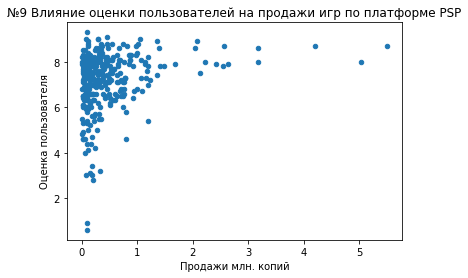

Коэффициент Пирсона по PSP 0.2416513950112826


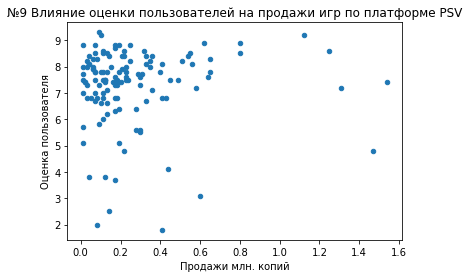

Коэффициент Пирсона по PSV 0.03315210857942409


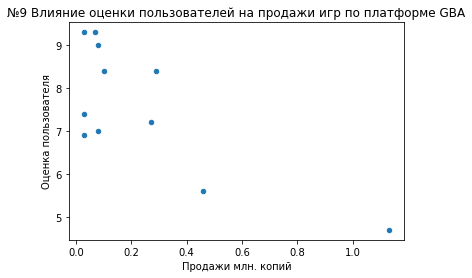

Коэффициент Пирсона по GBA -0.7512287759422375


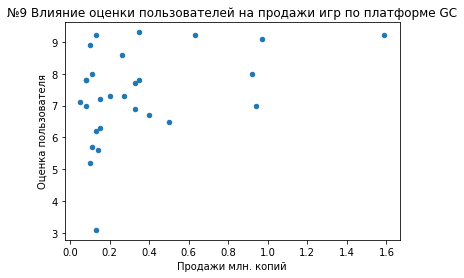

Коэффициент Пирсона по GC 0.39301655969536436


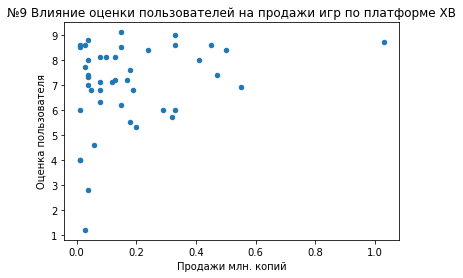

Коэффициент Пирсона по XB 0.2806461899223651


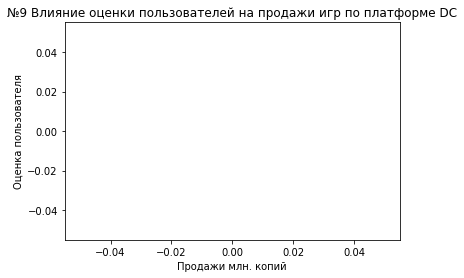

Коэффициент Пирсона по DC nan


In [83]:
for value in actual_data['platform'].unique():
    user_score_influence=actual_data.query('platform == @value & user_score.notna()')
    user_score_influence.plot(x='total_sales', y='user_score', kind='scatter')
    plt.xlabel("Продажи млн. копий")
    plt.ylabel("Оценка пользователя")
    plt.title(f'№9 Влияние оценки пользователей на продажи игр по платформе {value}')
    plt.show()
    corr=user_score_influence[['user_score','total_sales']].corr()
    print("Коэффициент Пирсона по", value, corr.loc['total_sales','user_score'])

*Графики по всем платформам подтверждают вывод, сделанный ранее по платформе PS4 - взаимосвязь между оценкой пользователей и продажами почти отсутствует, либо между ними нелинейная взаимосвязь.
Максимальный коэффицент Пирсона 0,41 по платфоме WiiU, по остальным платформам он почти везде равен нулю*

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, что получилось используешь автоматизацию построения графиков 👍
    
Таким образом мы скоращаем кодовую базу в проекте, а это всегда хорошо.
    
</div>

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [84]:
actual_data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,,32.77


heatmap лучше всего подходит для наших целей - изучения динамики

In [85]:
# импортируем библиотеку seaborn
import seaborn as sns

In [86]:
# построим сводную таблицу - продажи по годам в разбивке по жанрам
genres_pivot=actual_data.pivot_table(index='genre',columns='year_of_release',values='total_sales',aggfunc='sum')

In [87]:
genres_pivot

year_of_release,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,,,,,,,,,,
Action,66.06,104.85,134.96,137.69,115.29,116.68,119.25,122.51,97.23,72.02
Adventure,11.36,24.13,24.63,20.23,15.96,15.61,5.79,6.09,5.57,8.16
Fighting,22.42,17.49,35.02,31.90,14.69,22.41,9.18,7.09,15.85,7.90
Misc,66.97,91.46,86.06,75.81,95.14,54.38,22.22,25.27,23.38,11.57
Platform,49.29,35.07,35.13,40.53,31.04,27.68,18.37,24.54,8.81,6.05
Puzzle,10.74,23.56,15.23,19.79,10.75,4.96,1.72,0.96,1.49,0.71
Racing,33.81,38.78,70.04,33.69,34.37,34.81,13.61,12.37,16.66,8.07
Role-Playing,57.37,43.46,58.98,47.31,69.65,52.83,46.91,44.45,45.62,37.64
Shooter,38.24,70.61,59.16,69.29,76.83,98.18,71.75,62.04,65.21,67.51


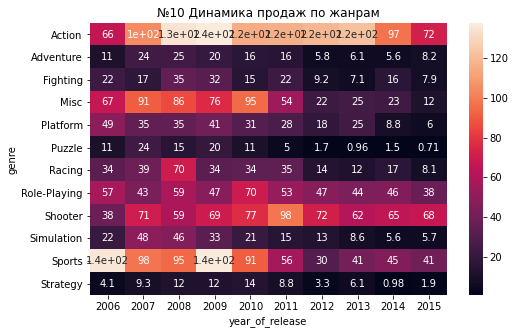

In [88]:
# построим хитмэп
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(genres_pivot,annot=True)
plt.title('№10 Динамика продаж по жанрам')
plt.show()

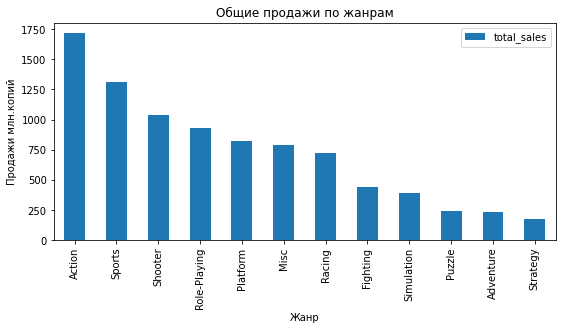

In [89]:
# посчитаем суммарные продажи по жанрам
data.groupby('genre').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False).plot(kind='bar',title='Общие продажи по жанрам',xlabel='Жанр',ylabel='Продажи млн.копий',figsize=(9,4));

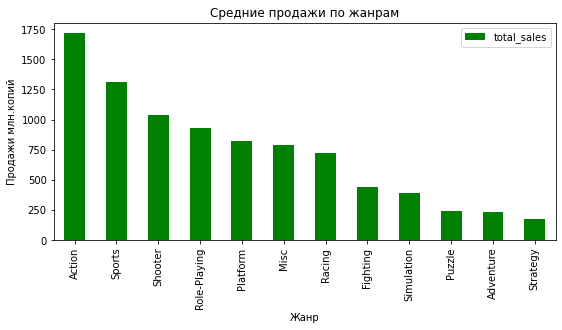

In [90]:
# посчитаем средние продажи по жанрам
data.groupby('genre').\
agg(total_sales=('total_sales','sum')).\
sort_values(by='total_sales',ascending=False).plot(kind='bar',title='Средние продажи по жанрам',xlabel='Жанр',ylabel='Продажи млн.копий',figsize=(9,4),color='green');

<div class="alert alert-warning">
<b>Комментарий ревьюера: ❗️</b>

<s>А если мы посмотрим на средние значения продаж, какие выводы мы сможем сделать ? 
    
Почему на средние значения ? 
    
Т.к. эта метрика более устойчива к выбросам, чем просто суммы и количественные показатели.
    
</div>

*Самый **высокий** объем продаж наблюдается по жанрам (по убыванию): 1. Action, 2. Sports 3. Shooter, 4. Role-Playing\
Самые **низкие** продажи - в жанрах 1. Strategy, 2. Adventure, 3. Puzzle, 4. Simulation 5. Fighting.\
Интересный факт, что в 2011 г произошло резкое падение объема продаж сразу по 5 жанрам.*

<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Давай также визуализируем эти данные только для каждого жанра, без платформ, так будет проще понять заказчику почему тот или иной жанр сейчас в топе.
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> + выше построила графики по средним значениям продаж и по общим продажам по каждому жанру</div>

**Вывод по разделу №3**:
* Больше всего игр было продано с 2005 по 2011 год.
* Если говорить о **платформах**, в среднем, жизненный цикл платформы составляет около 9 лет.\
В последние годы существовало 10 платформ, поэтому дальнейший анализ мы строили на данных по этим платформам (на данных с 2006 по 2015 г).\
По продажам  лидируют платформы PS4, XOne, WiiU, X360, PS3, 3DS.\
 **PS4, XOne**, являются **лидерами** по продажам и имеют растущий тренд.\
 **WiUU** занимает меньшую долю, но также имеет **растущий тренд**, а значит, и перспективы роста и увеличения доли.\
Эти 3 платформы являются потенциально прибыльными.\
Платформы **3DS, PS3 и X360** последние 4 года занимали неплохую долю в продажах, но похоже, что они завершают свой жизненный цикл, поэтому рассматривать их как перспектиные, не стоит.\
Игры **PS4** в основном продаются тиражом до 1,1 млн копий. Средний тираж - около 250 000 копий. У платформы много бестселлеров, продажи которых достигают до 15 млн копий.\
Игры **XOne** в основном продаются тиражом до 1,2 млн копий. Средний тираж - около 350 000 копий. У платформы также есть бестселлеры, продажи которых достигают до 7,5 млн копий.\
Игры **WiiU** в основном продаются до 500 000 копий. Средний тираж - около 150 000 копий. Продажи бестселлеров достигают до 12,6 млн копий.
* Если говорить о **влиянии оценок критиков** и **пользователей** на продажи, взаимосвязь между оценкой критиков есть, но не сильная. А значит, это один из факторов, который может оказать влияние на продажи, но явно не решающий.\
А вот связи между оценкой пользователей и продажами практически нет, либо она не линейнаяю
* Если говорит **о рейтинге жанров**, самые популярные жанры – **Action и Shooter**. **Role-Playing и Sports** следующие в рейтинги, но они имеют падающий в продажах тренд.
Наименее популярные жанры -  **Strategy, Puzzle,  Adventure и Fighting**.
Интересный факт, что падение по ним произошло почти одновременно – в 2011г.
    

## Составьте портрет пользователя каждого региона

### Определите для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж

In [91]:
data.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,comment,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,,35.52


Общее распределение по популярности платформа лучше всего смотреть по круговой диаграмме (какую долю занимает каждая из них).\
Но диаграмму имеет смысл строить по самым свежим, актуальным данным, так как в нее могут попасть жанры, которые уже закончили свой жизненный цикл.
Поэтому, перед тем как строить круговую диаграмму, посмотрим на динамику изменения популярности жанров по годам, и исходя из этого, примем решение, на каких данных строить круговую диаграмму.\

Сначала, построим хитмэпы для каждого региона, которые покажут динамику продаж по платформам

In [92]:
# построим сводную таблице по Сев. Америке
sales_platform_na=actual_data.pivot_table(index='platform',columns='year_of_release',values='na_sales',aggfunc='sum')

In [93]:
# top5_platform_na

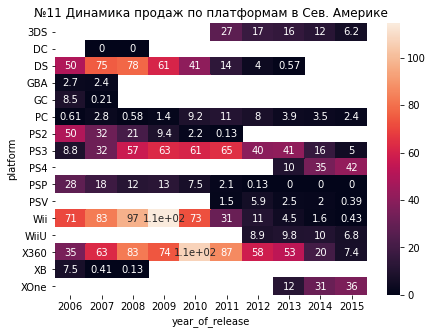

In [94]:
# построим хтмэп по сводной таблице
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_platform_na,annot=True)
plt.title('№11 Динамика продаж по платформам в Сев. Америке')
plt.show()

In [95]:
# построим сводную таблице по Европе
sales_platform_eu=actual_data.pivot_table(index='platform',columns='year_of_release',values='eu_sales',aggfunc='sum')

In [96]:
# top5_platform_eu

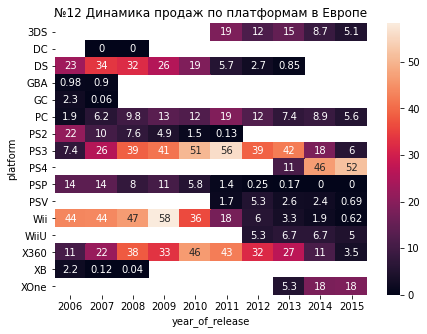

In [97]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_platform_eu,annot=True)
plt.title('№12 Динамика продаж по платформам в Европе')
plt.show()

In [98]:
# построим сводную таблице по Японии
sales_platform_jp=actual_data.pivot_table(index='platform',columns='year_of_release',values='jp_sales',aggfunc='sum')

In [99]:
# top5_platform_jp

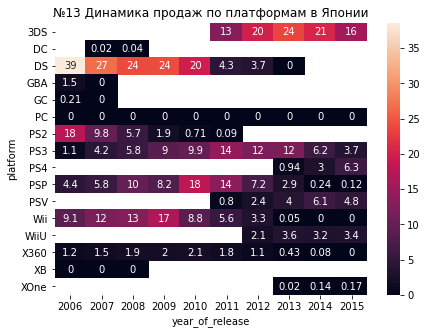

In [100]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_platform_jp,annot=True)
plt.title('№13 Динамика продаж по платформам в Японии')
plt.show()

*Для определения портрета пользователя не целесообразно брать весь исследуемый период, так как на графиках мы видим, что часть платформ закончила свой жизненный цикл (например, PSP, PS2, XB), часть находится в фазе заката. По ним следует ожидать снижение показателей.\
А часть, наоборот, находится в фазе восхода, и скорей всего, по ним можно ожидать рост (например, Xone, PS4).*

*Поэтому, для построения наиболее актуального портрета, исследуем данные за 2014-2015г.*

Построим круговые диаграммы по продажах в каждом регионе в срезах **по платформам**

**Северная Америка**

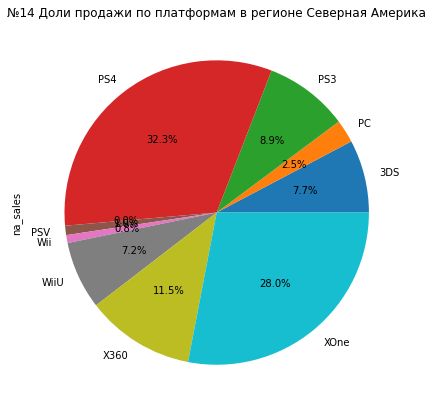

In [101]:
actual_data.query('year_of_release>=2014').groupby(['platform'])['na_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№14 Доли продажи по платформам в регионе Северная Америка")
plt.show()

*ТОП5 платформ по продажам игр в **Северной Америке**:*
* PS4 - 32,3% (растущий тренд)
* XOne - 28% (растущий тренд)
* X360 - 11,5% (падающий тренд)
* PS3 - 8,9% (падающий тренд)
* 3DS - 7,7% (падающий тренд)
* WiiU - 7,2% (растущий тренд)

**Европа**

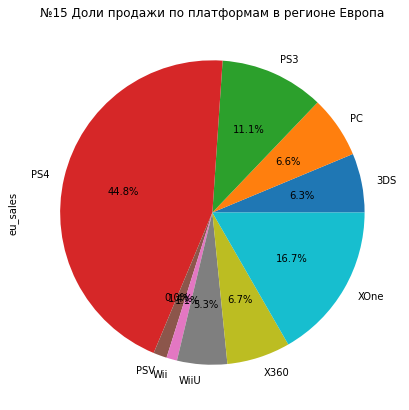

In [102]:
actual_data.query('year_of_release>=2014').groupby(['platform'])['eu_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№15 Доли продажи по платформам в регионе Европа")
plt.show()

*ТОП5 платформ по продажам игр в **Европе**:*

* PS4 - 44,8% (растущий тренд)
* XOne - 16,7% (растущий тренд)
* PS3 - 11,1% (падающий тренд)
* X360 - 6,7% (падающий тренд)
* PC - 6,6% (плавающий тренд)
* 3DS - 6,3% (падающий тренд)

**Япония**

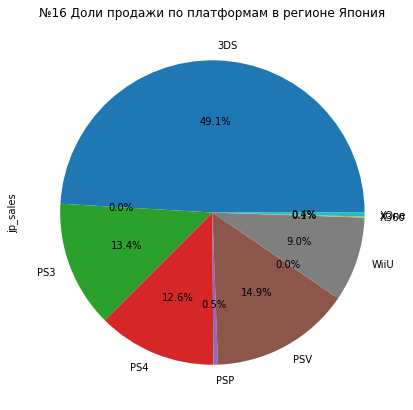

In [103]:
actual_data.query('year_of_release>=2014').groupby(['platform'])['jp_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№16 Доли продажи по платформам в регионе Япония")
plt.show()

*ТОП5 платформ по продажам игр в **Японии**:*

* 3DS - 49,1% (растущий тренд)
* PSV - 14,9% (растущий тренд)
* PS3 - 13,4% (падающий тренд)
* PS4 - 12,6% (растущий тренд)
* WiiU - 9% (растущий тренд)

*Структура рынка Европы и Северной Америки в целом схожи. Лидирующие позиции занимают платформы PS4 и XOne. При этом значительную долю американского рынка занимает WiiU, а в Европе PC.*

*В Японии рынок сильно отличается. Почти половину рынка занимает платформа 3DS, далее по популярности PSV, PS4 и WiUU.\
XOne занимает совсем маленькую долю.*

#### Самые популярные жанры (топ-5). Поясните разницу

Для начала посчитаем долю продаж каждого региона в обще объеме продаж

In [104]:
actual_data.query('year_of_release>=2014')['na_sales'].sum()

239.12999999999997

In [105]:
actual_data.query('year_of_release>=2014')['eu_sales'].sum()

219.46000000000004

In [106]:
actual_data.query('year_of_release>=2014')['jp_sales'].sum()

73.78

In [107]:
actual_data.query('year_of_release>=2014')['other_sales'].sum()

67.14

*Америка занимает около 39%, Европа - около 36%, Япония - около 12%, продажи в других регионах - 11%*

Общее распределение по популярности жанров тоже лучше всего смотреть по круговой диаграмме.
Но по аналогии с платформами, диаграмму имеет смысл строить по самым свежим, актуальным данным, поэтому сначала аналогично посмотрим на динамику изменения популярности жанров по годам.\
Построим хитмэпы для каждого региона, которые покажут динамику продаж по жанрам.

In [108]:
sales_genre_na=actual_data.pivot_table(index='genre',columns='year_of_release',values='na_sales',aggfunc='sum')

In [109]:
# top5_genre_na

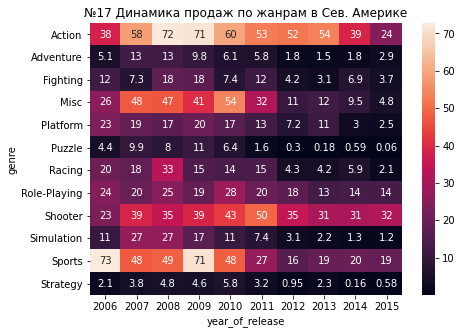

In [110]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_genre_na,annot=True)
plt.title('№17 Динамика продаж по жанрам в Сев. Америке')
plt.show()

In [111]:
sales_genre_eu=actual_data.pivot_table(index='genre',columns='year_of_release',values='eu_sales',aggfunc='sum')

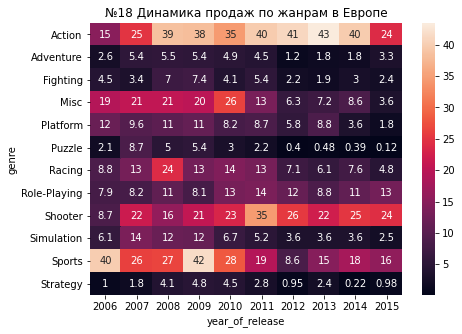

In [112]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_genre_eu,annot=True)
plt.title('№18 Динамика продаж по жанрам в Европе')
plt.show()

In [113]:
sales_genre_jp=actual_data.pivot_table(index='genre',columns='year_of_release',values='jp_sales',aggfunc='sum')

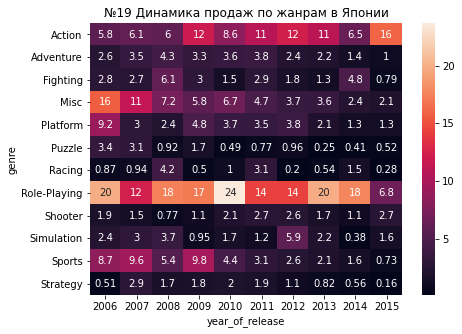

In [114]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(sales_genre_jp,annot=True)
plt.title('№19 Динамика продаж по жанрам в Японии')
plt.show()

*На хитмепе мы видим, что на первый взгляд предпочтения Америки и Европы в жанрах схожи, они соответствуют общей тенденции популярности жанров, которую мы увидели на общем хитмепе №10 ранее.\
В 2011 сразу несколько жанров показали значительное сниэение объемов продаж (Misc, Racing, Role-Playing, Sports).\
Shooter и Action сохранают растущий тренд, и являются лидерами.*

*У Японии другой тренд. Action как в Америке и Европе - один из самых популярных жанров. Role-Playing также лидирует и сохраняет тренд, в то время как Shooter вообще не пользовался и не пользуется популярностью.*

Для построения наиболее актуального портрета пользователя используем аналогичный период за 2014, 2015 г.(который мы использовали в анализе ранее, чтобы выбокри были сопоставими).

Построим круговые диаграммы, чтобы посмотреть долю продаж по жанрам в регионах.

**Северная Америка**

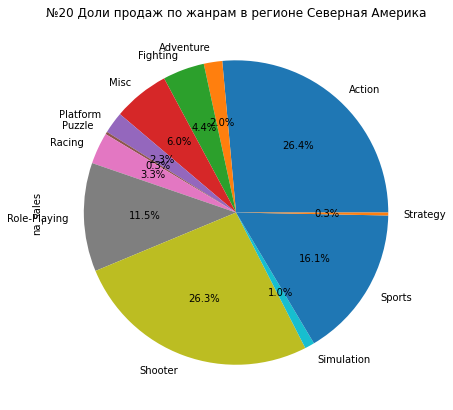

In [115]:
actual_data.query('year_of_release>=2014').groupby(['genre'])['na_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№20 Доли продаж по жанрам в регионе Северная Америка")
plt.show()

*ТОП5 популярных жанров игр в **Северной Америке**:*
* Action - 26,4% (растущий тренд)
* Shooter - 26,3% (растущий тренд)
* Sports - 16,1% (падающий тренд)
* Role-Playing - 11,5% (падающий тренд)
* Misc - 6,0% (падающий тренд)

**Европа**

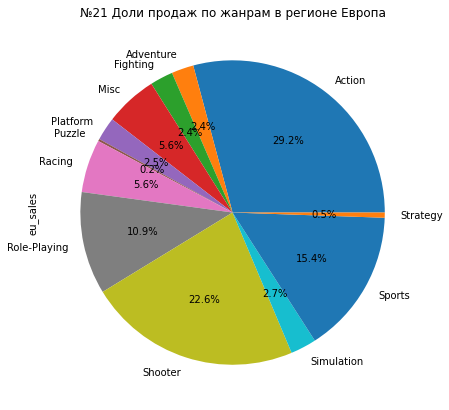

In [116]:
actual_data.query('year_of_release>=2014').groupby(['genre'])['eu_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№21 Доли продаж по жанрам в регионе Европа")
plt.show()

*ТОП5 популярных жанров игр в **Европе**:*
* Action - 29,2% (растущий тренд)
* Shooter - 22,6% (растущий тренд)
* Sports - 15,4% (падающий тренд)
* Role-Playing - 10,9% (падающий тренд)
* Misc и Racing - 5,6% (падающий тренд)

**Япония**

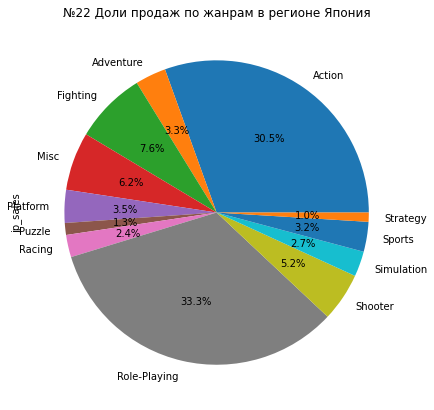

In [117]:
actual_data.query('year_of_release>=2014').groupby(['genre'])['jp_sales'].sum().plot(kind='pie', figsize=(7,7),autopct='%1.1f%%')
plt.title("№22 Доли продаж по жанрам в регионе Япония")
plt.show()

*ТОП5 популярных жанров игр в **Японии**:*
* Role-Playing - 33,3% (растущий тренд)
* Action - 30,5% (растущий тренд)
* Fighting - 7,6% (падающий тренд)
* Misc - 6,2% (падающий тренд)
* Shooter - 5,2% (падающий тренд)

*Структура рынка Европы и Северной Америки по популярности жанров в целом схожи. Лидирующие позиции занимают жанры Action и Shooter. При этом значительную долю и того, и другого рынка занимают жанры Sports, Role-Playing, Misc, но у них падающий тренд. Вероятно, скоро их жизненный цикл закончится.*

*В Японии рынок сильно отличается. Единственное сходство - лидирующая позиция жанра Action, которая находится на втором месте по популярности после Role-Playing. Значительно меньшую долю занимают Fighting, Misc, Shooter, но их как популярные жанры не стоит рассматривать, так как они показывают падающий тренд в продажах и, вероятно, скоро совсем потеряют популярность.*

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Перед тем, как приступать к анализу, расшифруем категории рейтингов

* **E** Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика.
* **E 10+** Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
* **EC** Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.
* **M** Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.
* **RP** Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.
* **T** Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

По аналогии с предыдущими пунктами, возьмем для анализа период 2014, 2015 г, чтобы портрет пользователя был наиболее актуальным

In [118]:
# построим сводную таблицу, чтобы посмотреть, какой объем продаж приходится на каждый рейтинг
rating=actual_data.query('rating.notna()&year_of_release>=2014').pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc=sum) 

In [119]:
# применим форматирование для более удобного восприятия
rating.style.background_gradient(axis=0,cmap='RdYlGn')

,eu_sales,jp_sales,na_sales
rating,,,
E,44.450000,7.870000,42.770000
E10+,22.350000,4.010000,29.420000
M,76.900000,6.810000,80.750000
T,24.280000,12.510000,30.000000


*В Европе и Сев. Америке преобладающую долю занимают игры с рейтингом **М** (лица, старше 17 лет), на втором месте - **Е** (для всех созрастных категорий).\
В Японии - игры с рейтингом **Т** (дети старше 13 лет)*

**Вывод по разделу №4**:
* **Портрет пользователя Северной Америки**\
Пользователь Северной Америки - это человек старше 17 лет, который предпочитает игры жанров Action и Shooter, и преимущественно играет на платформах PS4 и XOne.
* **Портрет пользователя Европы**\
Пользователь Европы - это человек старше 17 лет, который предпочитает игры жанров Action и Shooter, и преимущественно играет на платформах PS4 и XOne.
* **Портрет пользователя Японии**\
Пользователь Европы - это человек старше 13 лет, который предпочитает игры жанров Action и Role-Playing, и преимущественно играет на платформах 3DS и PSV.

Как мы видим, портреты пользователя Европы и Сев. Америки очень схожи.\
Портрет пользователя Японии кардинально отличается. Сходство только в лидирующей позиции жанра Action.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Достаточно детально проанализировали наши данные и изучили портреты пользователей.
    

    
Давай теперь проверим наши гипотезы.
    
</div>

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформируем нулевую и альтернативную гипотезу:\
**H0** - пользовательские рейтинги платформ Xbox One и PC **равны** - это гипотеза, которую мы будем проверять\
**H1** - пользовательские рейтинги платформ Xbox One и PC **не равны** - эта альтернативная гипотеза, которую мы примем как альтернативную в случае, если будет отвергнута первая

Таким образом, мы будем проверять гипотезу о равенстве двух генеральных совокупностей по взятым из нее выборкам, где генеральная совокупность - это общие даннные по всем играм, потенциально возможные данные, которые нам не доступны. А выборки - это срезы по платформе XOne и PC, сделанные на основании "актуального периода" (тоже выборки), который мы определили ранее.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Гипотезы сформулированы верно.
    
    
**Best practies:**
    

    
В том числе стоит визуализировать распределение каждой выборки, чтобы определить нормальное ли у них распределение или нет.
    
Так мы покажем логичность и последовательность наших действий.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> Спасибо за совет! Добавила графики ниже. </div>

In [120]:
from scipy import stats as st
import numpy as np

#создадим массивы, содержащие выборки
# выборка 1 - массив данных из "актуального" периода по платформе XOne
massiv_xone=actual_data.query('platform =="XOne" & user_score.notna() & user_score>0')['user_score']
# выборка 2 - массив данных из "актуального" периода по платформе PC
massiv_pc=actual_data.query('platform =="PC" & user_score.notna() & user_score>0')['user_score']

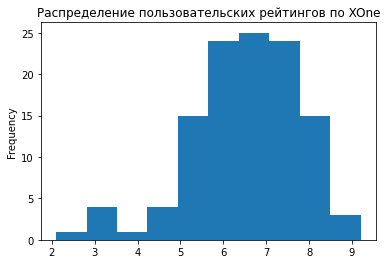

In [121]:
# построим гистограмму по выборкам, чтобы изучить распределение
massiv_xone.plot(kind='hist',title='Распределение пользовательских рейтингов по XOne');

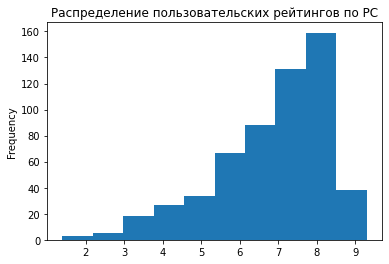

In [122]:
massiv_pc.plot(kind='hist',title='Распределение пользовательских рейтингов по PC');

*Выборки распределены по разному: у первой выборки по XOne распределение нормальное, а у второй оно отличается.
Поэтому в параметрах метода `st.ttest_ind` мы укажем `equal_var=False`, так как выборки по XOne и по PC нельзя назвать одинаковыми. А раз данные распределены по разному, соответственно, дисперсия будет отличаться.*

In [123]:
# зададим уровень статистической значимости 
alpha = .05

# для проверки гипотезы о равенстве двух ген совокупностей используем метод ниже
results = st.ttest_ind (massiv_xone, massiv_pc,equal_var=False)

# выведем значение p-value на экран
print("Рейтинг XOne:", massiv_xone.mean())
print("Рейтинг PC:",massiv_pc.mean())
print("p-значение по результатам теста =", results.pvalue)

if results.pvalue < alpha:
    print("Решение: отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ XOne и PC разные ")
else:
    print("Решение: не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги платформа XOne и PC одинаковые")

Рейтинг XOne: 6.477586206896552
Рейтинг PC: 6.872105263157895
p-значение по результатам теста = 0.003919849356846717
Решение: отвергаем нулевую гипотезу - средние пользовательские рейтинги платформ XOne и PC разные 


<div class="alert alert-danger">
<b>Комментарий ревьюера: ❌</b>

<s>Тут что-то сломалось, посмотри пожалуйста в чем дело.
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: ℹ️</b> +прошу прощения :( Исправила. </div>

В параметрах метода `st.ttest_ind` мы указали `equal_var=False`, так как выборки по XOne и по PC нельзя назвать одинаковыми. Например по гистограммам видно,что данные распределены по разному, соответственно, дисперсия будет отличаться.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Сформируем нулевую и альтернативную гипотезу:
H0 - пользовательские рейтинги жанров Action и Sports равны - это гипотеза, которую мы будем проверять
H1 - пользовательские рейтинги платформ Action и Sports не равны - эта альтернативная гипотеза, которую мы примем как альтернативную в случае, если будет отвергнута первая
Мы формулируем гипотезу наоборот, нежели указано в условии, так как нулевая гипотеза всегда формулируется как = (равенство двух средних)

Таким образом, мы будем проверять гипотезу о равенстве двух генеральных совокупностей по взятым из нее выборкам, где генеральная совокупность - это общие даннные по всем играм, потенциально возможные данные, которые нам не доступны. А выборки - это срезы по жанрам Action и Sports, сделанные на основании "актуального периода" (тоже выборки), который мы определили ранее.

<div class="alert alert-success">
<b>Комментарий ревьюера (2): ✅</b>

Гипотезы сформулированы верно.
    
</div>

In [124]:
# создадим массивы, содержащие выборки
# выборка 1 - массив данных из "актуального" периода по жанру Action
massiv_action=actual_data.query('genre =="Action" & user_score.notna() & user_score>0')['user_score']

# выборка 2 - массив данных из "актуального" периода по жанру Sports
massiv_sports=actual_data.query('genre =="Sports" & user_score.notna() & user_score>0')['user_score']

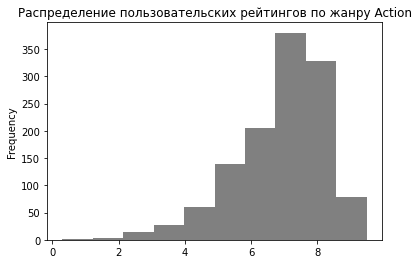

In [125]:
# построим гистограмму по выборкам, чтобы изучить распределение
massiv_action.plot(kind='hist',title='Распределение пользовательских рейтингов по жанру Action',color='Grey');

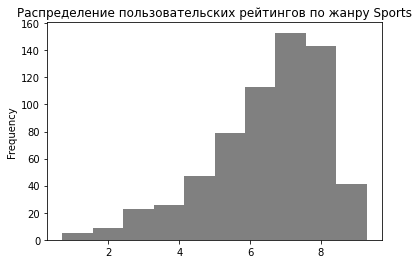

In [126]:
massiv_sports.plot(kind='hist',title='Распределение пользовательских рейтингов по жанру Sports',color='Grey');

*В параметрах метода `st.ttest_ind` мы не будем указыватьи `equal_var`, так распределение по жанрам Action и Sport +/- схожее.*

In [127]:
# зададим уровень статистической значимости 
alpha = .05

# для проверки гипотезы о равенстве двух ген совокупностей используем метод ниже
results = st.ttest_ind (massiv_action, massiv_sports)

# выведем значение p-value на экран
print("Рейтинг Action:", massiv_action.mean())
print("Рейтинг Sports:",massiv_sports.mean())
print("p-значение по результатам теста =", results.pvalue)

if results.pvalue < alpha:
    print("Решение: отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports разные ")
else:
    print("Решение: не получилось отвергнуть нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports одинаковые")

Рейтинг Action: 6.895076674737692
Рейтинг Sports: 6.47339593114241
p-значение по результатам теста = 2.6271699199490583e-09
Решение: отвергаем нулевую гипотезу - средние пользовательские рейтинги жанров Action и Sports разные 


**Вывод по разделу №5**:\
На основаниие выборок, мы проверили гипотезы и выяснили, что мы не можем принять гипотезу о том, что средние пользовательские оценки платформ XOne и PC равны. Такое вполне реально, ведь у разных платформ разные пользователи, а соответственно, и разные оценки. Разница среднего двух выборок не большая, но она статистически значима.\
Также на основаниие выборок, мы проверили гипотезы и выяснили, что мы не можем принять гипотезу о том, что средние пользовательские оценки жанров Action и Sports. Аналогично - такое вполне реально, ведь у рахных жанров разные пользователи, а соответственно, и разные оценки. Разница среднего двух выборок не большая, но она статистически значима.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Обрати внимание, что наши действия также повторяются с точки зрения расчетов статистических тестов, это говорит о том, что мы можем также создать здесь функцию 😊
    
</div>

# Общий вывод:


**Предобработка данных**\
В исходном датафрейме названия столбцов были написаны в разном стиле, в датафрейме имелись пропущенные значения, некорректные типы данных. Тип данных был исправлен, несколько строк с пустыми значениями были удалены, названия столбцов унифицированы и приведены к нижнему регистру, посчитаны общие продажи в отдельном столбце, датафрейм проверен на наличие аномальных значений.

**Особенности на рынке игр**\
В период с 2005 по 2011 год продавалось больше всего игр.\
В последние годы рынок игр был представлен 9 платформами: PS4, XOne, 3DS, PS3, WiiU, X360, PC, PSV, Wii, PSP.\
В среднем, жизненный цикл платформы составляет около 9 лет. Поэтому, некоторые из вышеперечисленных платформ, вероятно, скоро покинут рынок.\
По продажам лидируют **платформы** PS4, XOne, WiiU, X360, PS3, 3DS.\
Очевидными лидерами являются платформы **PS4, XOne** - они занимают наибольшую долю в продажах и находятся в начале или в середине своего жизненного цикла, и вероятно, будут набирать популярность, так как их объем продаж ежегодно растет.\
Большая часть игр **PS4** продается тиражом до 1,1 млн копий, продажи бестселлеров достигают до 15 млн копий.\
По платформе **XOne** - большая часть игр продается до 1,2 млн копий, продажи бестселлеров - до 7,5 млн копий.\
**WiiU** занимает меньшую долю в продажах, но имее положительную динамику продаж и находится в середине своего жизненного цикла. Поэтому, скорей всего, будет набирать популярность или сохранит продажи не текущем уровне.\
Большая часть игр **WiiU** продается тиражом до 500 000 копий, но у платформы есть бестселлеры, которые достигают в продажах до 12 млн копий.\
**PS4, XOne и WiiU - потенциально прибыльные платформы.**

Платформы **3DS, PS3 и X360** последние 4 года занимали неплохую долю, но они находятся в середине жизненного цикла и имеют отрциательную динамику продаж, и похоже, скоро покинут рынок, поэтому рассматривать их как перспектиные не стоит.

Если говорит о рейтинге **жанров**, **самые популярные** жанры – **Action и Shooter**. **Role-Playing и Sports** следующие в рейтинге, но они теряют свою популярность. **Наименее популярные жанры - Strategy, Puzzle, Adventure и Fighting**. Интересный факт, что падение по ним произошло почти одновременно – в 2011г.

Несмотря на то, что общая тенденция на рынке игр в чем-то схожа с тенденциями в отдельных регионах, тем не менее, есть различия в **портретах пользователей** в разных регионах.\
Портреты пользователя **Европы и Сев. Америки** очень схожи - это человек старше 17 лет, который предпочитает игры жанров Action и Shooter, и преимущественно играет на платформах PS4 и XOne, в то время, как в **Японии** - это человек старше 13 лет, который предпочитает игры жанров Action и Role-Playing, и преимущественно играет на платформах 3DS и PSV (если в общем масштабе и на рынках Европы и Америки, эти платформы падают в продажах, то в Японии, наоборот - сохраняют усточивость и даже немного растут).\
То есть в Сев Америке/Европе и Японии разная целевая аудитория, популярностью пользуются разные платформы и жанры, сходство только в лидирующей позиции жанра Action.


Если говорить о **влиянии оценок критиков и пользователей на продажи**, взаимосвязь между оценкой критиков и продажами есть, но не сильная. А значит, это один из факторов, который может оказать влияние на продажи, но явно не решающий.
А вот связи между оценкой пользователей и продажами практически нет, либо на зависимость влияют какие-то третьи факторы.

**Подводя итоги**, планируя рекламную кампания, стоит сделать ставки на Американский и Европейский рынки, поскольку в общем объеме продаж они занимают наибольшую долю - 39% Америка и 36% Европа, в то время, как Япония - 12%, а другие страны - 11%.\
Акцент стоит сделать на продвижении игр, выпускаемых на платформах PS4 и XOne, жанров Action и Shooter, для пользователей старше 17 лет. Платформы PS4 и XOne находятся в начале и середине жизненного цикла и набирают популярность - показывают рост в продажах, игры жанров Action и Shooter являются наиболее продаваемыми, а пользователи, старше 17 лет - основная аудитория. Эта комбинация платформ, жанров и ЦА является наиболее перспективной.

Планируя рекламную поддержку в Японии, акцент стоит сделать на продвижении игр, выпускаемых на платформах 3DS и PSV, жанров Action и Role-Playing, для пользователей старше 13 лет. Платформы 3DS и PSV сохраняют устойчивую динамику в продажах, игры жанров Action и Roly-Playing являются наиболее продаваемыми, а пользователи, старше 13 лет - основная аудитория. Эта комбинация платформ, жанров и ЦА является наиболее перспективной.

При проверке гипотез о равенстве средних пользовательских оценок платформ XOne и PC, мы определили, что вероятность, что они равны - слишком маленькая (меньше 1%), так же как и вероятность того, что равны средние пользовательские оценки жанров Action и Sports (вероятность этого около 0%).